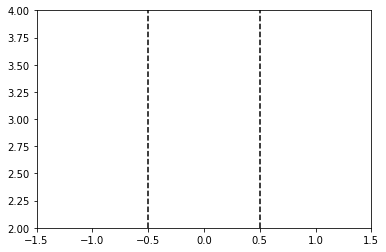

In [1]:
from intersection_sim import Simulator
from pedestrian_agent import Agent

import numpy as np


In [2]:
from intersection_sim import Simulator
from pedestrian_agent import Agent
from mm_mpc_inter import MM_MPC_TI
from uncontrolled_agent import UncontrolledAgent

import numpy as np



ev_noise_std=[0.001,0.001]
ev=Agent(role='EV', cl=3, noise_std=ev_noise_std)
tv_noise_std=[0.1, 0.1]
agents=[Agent(role='TV', cl=4, state=np.array([0, 7.]), noise_std=tv_noise_std) for i in range(1)]
agents.append(Agent(role='ped', cl=7, state=np.array([0., 4.]), noise_std=tv_noise_std, s_dec = 20))
agents.append(Agent(role='ped', cl=9, state=np.array([0., 2.]), noise_std=tv_noise_std, s_dec = 10))

tv_n_stds=[v.noise_std for v in agents]
agents.append(ev)
Sim=Simulator(agents)



Sim.set_MPC_N(10)

initial_states = [[0.0, 2.0]]
final_states = [[100.0, 4.0]]

cost_func_params = {
    'Q': np.array([[7.0, 0.0, 0.0], [0.0, 7.0, 0.0], [0.0, 0.0, 2.5]]),
    'R': np.array([[5.5, 0.0], [0.0, .5]]),
    'P': np.array([[12.5, 0.0], [0.0, 12.5]]),
    'Qc': 8,
    'kappa': 3 
}
mpc_params = {
    'num_agents': 1,
    'dt': 0.2,
    'N' : 10,
    'rob_dia': 0.3,
    'v_lim': 8.0,
    'omega_lim': 1.0,
    'total_sim_timestep': 200,
    'obs_sim_timestep': 100,
    'epsilon_o': 0.05,
    'epsilon_r': 0.05,
    'safety_margin': 0.05,
    'goal_tolerence': 0.2, 
    'linearized_ca': True
}

obs_traj = []
static_obs = []

obs = {"static": static_obs, "dynamic": obs_traj}

num_trials = 1
algs = ["MPC"]
vel_var_levels = [0.05, 0.4]
rationality = 0.5
T = 6
y_pos = 3

scenario = "test"
trial = 1
uncontrolled_fleet = UncontrolledAgent(init_state=[(0, 0, -np.pi/2)], dt=mpc_params['dt'], H=mpc_params['dt']*mpc_params['N'], action_variance=0.2)
uncontrolled_fleet_data = uncontrolled_fleet.simulate_diff_drive()

mpc = MM_MPC_TI(initial_states, final_states, cost_func_params, obs, mpc_params, scenario, trial, uncontrolled_fleet, uncontrolled_fleet_data, map=map, feedback=True, robust_horizon=2, ref=None)
# mpc = MM_MPC_TI(initial_states, final_states, cost_func_params, obs, mpc_params, scenario, trial, uncontrolled_agent, uncontrolled_traj)
mpc.simulate(Sim)

0

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Agent 0 Solve Time: 0.9722230434417725
Agent state:  [1.42905 7.29045]  Agent control:  [ 1.45227  1.14318  0.87045  0.63409  0.43409  0.27045  0.14318  0.05227
  0.      -0.00005]
1
Agent 0 Solve Time: 0.45209360122680664
Agent state:  [2.91199 7.53902]  Agent control:  [ 1.2428   0.93371  0.66098  0.42462  0.22462  0.06098  0.      -0.
 -0.      -0.00003]
Resetting agent: 1
Reached 1.5644893440499916
2
Agent 0 Solve Time: 0.41909098625183105
Agent state:  [4.43987 7.73972]  Agent control:  [ 1.0035   0.69441  0.42169  0.18532  0.      -0.      -0.      -0.
 -0.      -0.00003]
3
Agent 0 Solve Time: 0.50

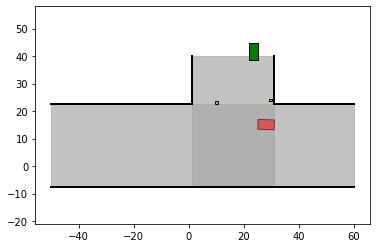

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.transforms as tf
from celluloid import Camera
from IPython.display import HTML
import pdb

fig, ax= plt.subplots()
camera = Camera(fig)

for  i in range(Sim.t):
    Sim.draw_intersection(ax, i)
    camera.snap()

animation = camera.animate(repeat = True, repeat_delay = 100)
HTML(animation.to_html5_video())

In [ ]:
from intersection_sim import Simulator
from pedestrian_agent import Agent
from mm_mpc_inter import MM_MPC_TI
from uncontrolled_agent import UncontrolledAgent

import numpy as np



ev_noise_std=[0.001,0.01]
ev=Agent(role='EV', cl=3, noise_std=ev_noise_std)
tv_noise_std=[0.1, 0.1]
agents=[Agent(role='TV', cl=4, state=np.array([0, 7.]), noise_std=tv_noise_std) for i in range(1)]
agents.append(Agent(role='ped', cl=7, state=np.array([0., 4.]), noise_std=tv_noise_std, s_dec = 20))
agents.append(Agent(role='ped', cl=9, state=np.array([0., 2.]), noise_std=tv_noise_std, s_dec = 10))

tv_n_stds=[v.noise_std for v in agents]
agents.append(ev)
Sim=Simulator(agents)



Sim.set_MPC_N(10)

initial_states = [[0.0, 2.0]]
final_states = [[100.0, 4.0]]

cost_func_params = {
    'Q': np.array([[7.0, 0.0, 0.0], [0.0, 7.0, 0.0], [0.0, 0.0, 2.5]]),
    'R': np.array([[5.5, 0.0], [0.0, .5]]),
    'P': np.array([[12.5, 0.0], [0.0, 12.5]]),
    'Qc': 8,
    'kappa': 3 
}
mpc_params = {
    'num_agents': 1,
    'dt': 0.2,
    'N' : 10,
    'rob_dia': 0.3,
    'v_lim': 8.0,
    'omega_lim': 1.0,
    'total_sim_timestep': 200,
    'obs_sim_timestep': 100,
    'epsilon_o': 0.05,
    'epsilon_r': 0.05,
    'safety_margin': 0.05,
    'goal_tolerence': 0.2, 
    'linearized_ca': True
}

obs_traj = []
static_obs = []

obs = {"static": static_obs, "dynamic": obs_traj}

num_trials = 1
algs = ["MPC"]
vel_var_levels = [0.05, 0.4]
rationality = 0.5
T = 6
y_pos = 3

scenario = "test"
trial = 1
uncontrolled_fleet = UncontrolledAgent(init_state=[(0, 0, -np.pi/2)], dt=mpc_params['dt'], H=mpc_params['dt']*mpc_params['N'], action_variance=0.2)
uncontrolled_fleet_data = uncontrolled_fleet.simulate_diff_drive()

mpc = MM_MPC_TI(initial_states, final_states, cost_func_params, obs, mpc_params, scenario, trial, uncontrolled_fleet, uncontrolled_fleet_data, map=map, feedback=False, robust_horizon=2, ref=None)
# mpc = MM_MPC_TI(initial_states, final_states, cost_func_params, obs, mpc_params, scenario, trial, uncontrolled_agent, uncontrolled_traj)
mpc.simulate(Sim)

0
Agent 0 Solve Time: 0.17726731300354004
Agent state:  [1.43333 7.33333]  Agent control:  [ 1.66667  1.28485  0.93939  0.6303   0.35758  0.12121  0.      -0.
 -0.      -0.      -0.      -0.00003]
1
Agent 0 Solve Time: 0.22010278701782227
Agent state:  [2.92715 7.60485]  Agent control:  [ 1.35758  0.97576  0.6303   0.32121  0.04848  0.      -0.      -0.
 -0.      -0.      -0.      -0.00003]
Resetting agent: 1
Reached 1.5220710468657557
2
Agent 0 Solve Time: 0.1870708465576172
Agent state:  [4.46869 7.81051]  Agent control:  [ 1.02828  0.64646  0.30101  0.      -0.      -0.      -0.      -0.
 -0.      -0.      -0.      -0.00003]
3
Agent 0 Solve Time: 0.2775380611419678
Agent state:  [6.04408 7.94343]  Agent control:  [ 0.66465  0.28283  0.      -0.      -0.      -0.      -0.      -0.
 -0.      -0.      -0.      -0.00003]
4
Agent 0 Solve Time: 0.15509390830993652
Agent state:  [7.63842 8.     ]  Agent control:  [ 0.28283  0.      -0.      -0.      -0.      -0.      -0.      -0.
 -0.     

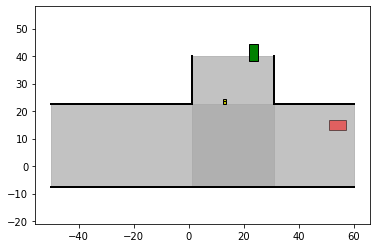

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.transforms as tf
from celluloid import Camera
from IPython.display import HTML
import pdb

fig, ax= plt.subplots()
camera = Camera(fig)

for  i in range(Sim.t):
    Sim.draw_intersection(ax, i)
    camera.snap()

animation = camera.animate(repeat = True, repeat_delay = 100)
HTML(animation.to_html5_video())